# Optimal Portfolio

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:

import pandas as pd
import sys
import ml_logic.sp500_data as update_data
import ml_logic.five_best_stock as five_best 
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [7]:
# Optional:
# update_data.update_sp500_data()

  9%|▊         | 43/505 [00:15<03:20,  2.30it/s]

ANTM not found


 12%|█▏        | 60/505 [00:22<03:31,  2.10it/s]

BLL not found


 13%|█▎        | 65/505 [00:25<03:31,  2.08it/s]

BRK.B not found


 16%|█▌        | 81/505 [00:34<04:03,  1.74it/s]

BF.B not found


 20%|█▉        | 100/505 [00:44<04:26,  1.52it/s]

CERN not found


 23%|██▎       | 115/505 [00:51<02:48,  2.31it/s]

CTXS not found


 30%|██▉       | 149/505 [01:07<03:24,  1.74it/s]

DISCA not found


 30%|██▉       | 150/505 [01:08<03:45,  1.57it/s]

DISCK not found


 32%|███▏      | 160/505 [01:13<03:05,  1.86it/s]

DRE not found


 38%|███▊      | 190/505 [01:28<02:57,  1.78it/s]

FB not found


 39%|███▉      | 196/505 [01:33<04:22,  1.18it/s]

FRC not found


 39%|███▉      | 198/505 [01:34<03:38,  1.41it/s]

FISV not found


 40%|████      | 204/505 [01:37<02:41,  1.87it/s]

FBHS not found


 48%|████▊     | 244/505 [01:56<02:05,  2.07it/s]

INFO not found


 53%|█████▎    | 268/505 [02:08<02:24,  1.64it/s]

KSU not found


 66%|██████▋   | 335/505 [02:41<01:18,  2.17it/s]

NLSN not found


 68%|██████▊   | 341/505 [02:45<01:35,  1.71it/s]

NLOK not found


 72%|███████▏  | 364/505 [02:55<01:06,  2.12it/s]

PBCT not found


 72%|███████▏  | 366/505 [02:56<01:07,  2.07it/s]

PKI not found


 84%|████████▍ | 424/505 [03:26<00:40,  1.98it/s]

SIVB not found


 90%|████████▉ | 453/505 [03:49<00:48,  1.08it/s]

TWTR not found


 94%|█████████▍| 474/505 [04:01<00:14,  2.12it/s]

VIAC not found


 98%|█████████▊| 496/505 [04:12<00:04,  1.92it/s]

WLTW not found


 99%|█████████▉| 499/505 [04:15<00:05,  1.00it/s]

XLNX not found


100%|██████████| 505/505 [04:20<00:00,  1.94it/s]


In [9]:
tickers, sp500_data = update_data.get_sp500_data()
ladj = []
print('Reading data:')

for t in tqdm(sp500_data):
    ladj.append(t['adjclose'])


Reading data:


100%|██████████| 481/481 [00:00<00:00, 14492.83it/s]


In [10]:
sp500_data

[                  open        high        low      close   adjclose   volume  \
 2010-01-04   83.089996   83.449997  82.669998  83.019997  55.033222  3043700   
 2010-01-05   82.800003   83.230003  81.699997  82.500000  54.688522  2847000   
 2010-01-06   83.879997   84.599998  83.510002  83.669998  55.464115  5268500   
 2010-01-07   83.320000   83.760002  82.120003  83.730003  55.503899  4470100   
 2010-01-08   83.690002   84.320000  83.300003  84.320000  55.894997  3405800   
 ...                ...         ...        ...        ...        ...      ...   
 2023-08-21  100.000000  100.099998  98.529999  99.190002  99.190002  2302700   
 2023-08-22   99.669998   99.720001  98.110001  98.510002  98.510002  2590600   
 2023-08-23   98.750000  100.180000  97.699997  99.650002  99.650002  3264900   
 2023-08-24   99.269997  100.669998  98.489998  98.500000  98.500000  1900000   
 2023-08-25   98.980003   99.410004  98.019997  98.949997  98.949997  2186600   
 
            ticker  
 2010

In [11]:
df = pd.concat(ladj,axis=1,keys=tickers)

In [12]:
df.head()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WHR,WMB,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2010-01-04,55.033222,6.061760,19.244108,NaN,8.74,32.589882,9.911358,22.142735,37.090000,36.574165,...,55.577560,8.836957,41.758167,13.286604,NaN,19.435677,28.670000,52.905674,10.726543,NaN
2010-01-05,54.688522,5.984307,19.088633,NaN,8.53,32.791290,9.928901,22.262348,37.700001,36.356781,...,55.462276,8.947363,44.297874,13.129032,NaN,19.369213,28.620001,54.580456,11.104753,NaN
2010-01-06,55.464115,5.987025,19.194643,NaN,8.40,33.139900,9.876273,22.206059,37.619999,36.673794,...,54.973988,9.237705,43.716805,13.154244,NaN,19.230736,28.400000,54.562832,12.070380,NaN
2010-01-07,55.503899,6.004688,19.353651,NaN,8.40,33.108910,9.639451,21.973869,36.889999,36.664730,...,56.154049,9.172276,44.650429,13.097516,NaN,19.225199,27.690001,55.814507,13.422260,NaN
2010-01-08,55.894997,6.093015,19.452595,NaN,8.23,32.977215,9.560513,21.699463,36.689999,36.809647,...,57.347630,9.245882,44.330521,13.103821,NaN,19.230736,27.600000,54.642166,13.204998,NaN


### 1. Cluster de S&P500 tickers with respect to the data of the last 60 days

Reading data:


100%|██████████| 481/481 [00:00<00:00, 8314.25it/s]


<class 'pandas.core.series.Series'> 481 (481,) (481, 2)


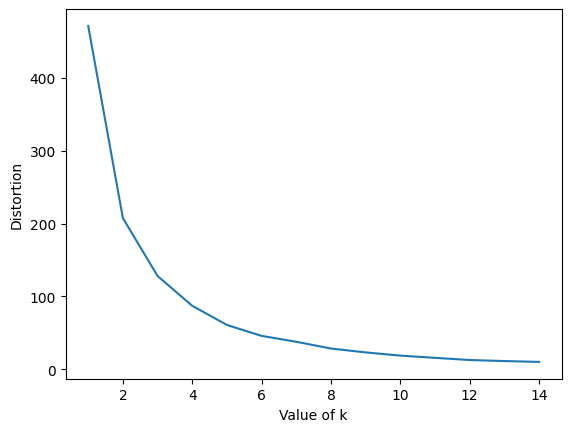

<class 'pandas.core.series.Series'> 481 (481,) (481, 2)
5


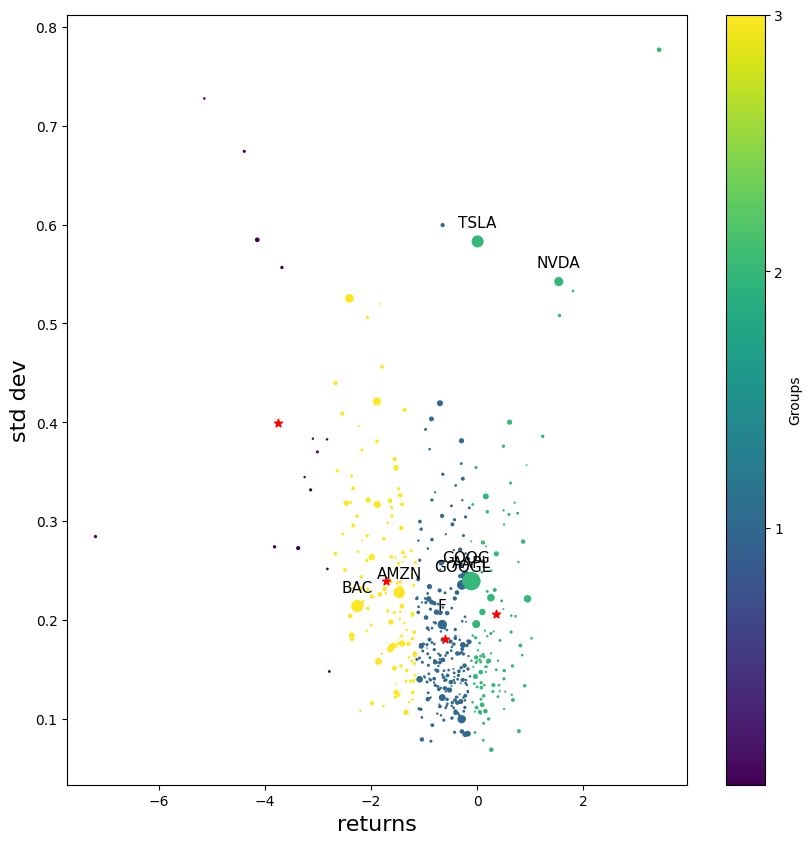

Silhouette:  0.5107927211248825


In [26]:
clustered_df = five_best.get_clustered_groups(ndays=10,nk=4)

In [28]:
clustered_df

{0:          Returns  Volatility  Sharpe Ratio
 Symbol                                    
 AAP    -2.831890    0.382700     -7.399759
 ALK    -2.787718    0.147832    -18.857329
 DE     -3.141947    0.331574     -9.475860
 DXCM   -3.822484    0.273950    -13.953232
 DFS    -3.682619    0.556596     -6.616327
 DISH   -7.203131    0.284334    -25.333356
 DLTR   -4.393894    0.674113     -6.518038
 ENPH   -3.012986    0.370015     -8.142868
 ILMN   -2.824729    0.251587    -11.227642
 KEYS   -5.148499    0.727595     -7.076049
 LUMN   -4.148842    0.584609     -7.096781
 RMD    -3.098494    0.383368     -8.082290
 ULTA   -3.254204    0.344487     -9.446514
 WBA    -3.377148    0.272671    -12.385443,
 1:          Returns  Volatility  Sharpe Ratio
 Symbol                                    
 MMM    -0.807276    0.169922     -4.750863
 AOS    -0.594874    0.163907     -3.629347
 ABT    -0.494408    0.137043     -3.607673
 ABBV   -1.040385    0.079063    -13.158991
 AFL    -0.720165    0.12

Return rate of a stock = sharp ratio

##### **Obs:**  One of the groups have consistent negative returns, so we will ignore them

Below we see that it corresponds to the first cluster

### We take the first 7 members of the other groups ordered by Sharpe Ratio

In [14]:
ntop = 10
new_tickers = []
for ic in [1]:
    iclus = clustered_df[ic]
    li = list(iclus.sort_values('Sharpe Ratio', ascending=False).head(ntop).index)
    for l in li:
        new_tickers.append(l)

In [53]:
corr, ncomb= five_best.get_optimal_portfolio(new_tickers,ndays=10, corr_ratio=0.51, only_corr=True)

corr = corr*1.2


Preparing data...


100%|██████████| 481/481 [00:00<00:00, 9749.25it/s]


252
Evaluating correlation of combinations


100%|██████████| 252/252 [00:00<00:00, 781.30it/s]

Number of selected combinations: 9
Minimum correlation:  0.47903971719023164


In [54]:
res_portfolio = five_best.get_optimal_portfolio(new_tickers,ndays=10, corr_ratio=0.67, only_corr=True)

Preparing data...


100%|██████████| 481/481 [00:00<00:00, 11000.69it/s]


252
Evaluating correlation of combinations


100%|██████████| 252/252 [00:00<00:00, 677.07it/s]

Number of selected combinations: 140
Minimum correlation:  0.47903971719023164


In [55]:
res_portfolio

(0.47903971719023164, 140)

Preparing data...


100%|██████████| 481/481 [00:00<00:00, 11248.54it/s]


252
Evaluating correlation of combinations


100%|██████████| 252/252 [00:00<00:00, 776.27it/s]


Number of selected combinations: 9
Minimum correlation:  0.47903971719023164
Evaluating CLA for each combination


100%|██████████| 9/9 [01:55<00:00, 12.84s/it]


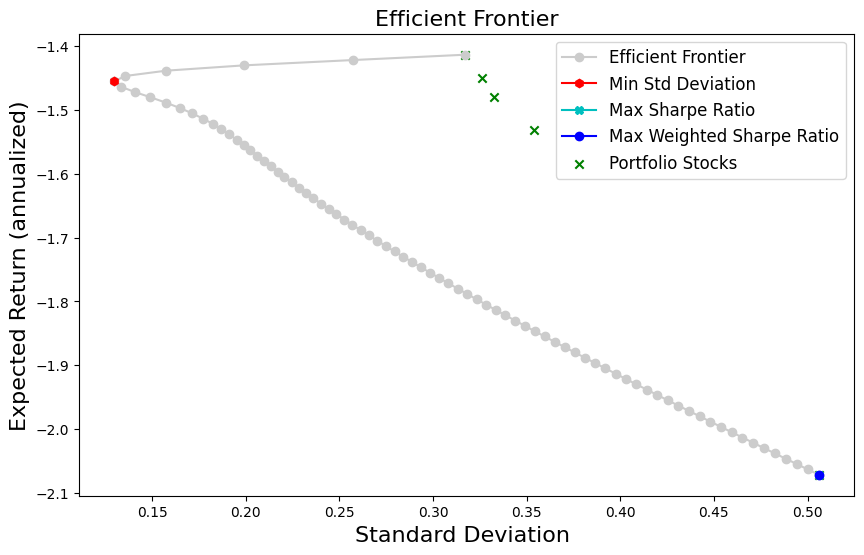

In [56]:
res_portfolio = five_best.get_optimal_portfolio(new_tickers,ndays=10, corr_ratio=0.51, only_corr=False)

In [18]:
minRiskReturn = res_portfolio[0][1]['Return']
minRiskWeights = res_portfolio[0][1]['Weights']

res_portfolio[1].columns
maxSharpeReturn = res_portfolio[0][2]['Return']
maxSharpeWeights = res_portfolio[0][2]['Weights']

print ('Analysis resutls:')
print ('Tickers: ', list(res_portfolio[1].columns))
print ('Minimum risk return and weights:', minRiskReturn, minRiskWeights)
print ('Max Sharpe ratio return and weights:', maxSharpeReturn, maxSharpeWeights)

Analysis resutls:
Tickers:  ['CCL', 'NCLH', 'NXPI', 'TGT', 'VFC']
Minimum risk return and weights: -1.4551439603791094 [0.11032587 0.21484595 0.16260519 0.49715578 0.01506721]
Max Sharpe ratio return and weights: -2.0714974202301515 [ 6.32535603e-12 -3.04128671e-12  1.03799556e-12 -3.10135318e-12
  1.00000000e+00]


In [23]:
def get_portfolio_stock_components(minRiskWeights, res_portfolio,df, investment=1e5):
    sel_tickers = list(res_portfolio[1].columns)
    prices = []
    for tick in sel_tickers:
        prices.append(df[tick][-1])
    n_actions = []
    
    for i in range(5):
        amount = investment * minRiskWeights[i]
        nac = round(amount/prices[i])
        n_actions.append(nac)
    print ('The advise is to invest:')
    for i in range(5):
        print('%4i actions of %6s'%(n_actions[i], sel_tickers[i]))
    return n_actions

In [24]:
n_actions = get_portfolio_stock_components(minRiskWeights, res_portfolio, df)

The advise is to invest:
 694 actions of    CCL
1274 actions of   NCLH
  83 actions of   NXPI
 408 actions of    TGT
  80 actions of    VFC


In [22]:
n_actions

[694, 1274, 83, 408, 80]